<a href="https://colab.research.google.com/github/joshIsac/sem-2-lab-/blob/main/2348523_lab_1_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [155]:
data=pd.read_csv('/content/drive/MyDrive/Program_1_Dataset.csv')
data

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
502,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
503,6.28807,0.0,18.10,0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
504,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6


In [156]:
data.shape

(506, 14)

In [157]:
data.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [158]:
data.dtypes

Crime_Rate          float64
Zone_proportion     float64
Non_Retail_Acres    float64
CHAS                  int64
NOX                 float64
Avg_rooms           float64
AGE                 float64
Distance            float64
RAD                   int64
Property_TaxRate      int64
PTRATIO             float64
B                   float64
LSTAT               float64
MValue              float64
dtype: object

In [159]:
data.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [160]:
df=pd.DataFrame(data)
df


,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
502,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
503,6.28807,0.0,18.10,0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
504,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6


In [161]:
X=df['Avg_rooms ']
y=df['MValue']

In [162]:
X = df['Avg_rooms '].values.reshape(-1, 1)
y = df['MValue'].values



In [163]:
mean_value = data['MValue'].mean()
mean_value

22.532806324110673

mean value of Mvalue


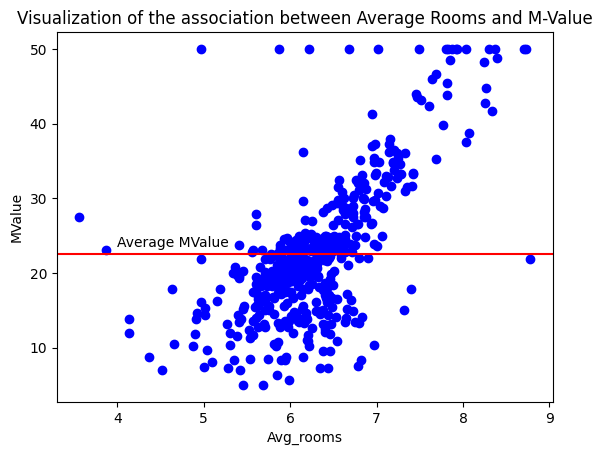

In [164]:
plt.scatter(data.iloc[:,5],data.iloc[:,-1],color='blue')
plt.axhline(y=mean_value,color='red') #plotting mean, if it is axvline that would be x=mean_value
plt.annotate("Average MValue", xy=(4, mean_value+1))
plt.xlabel("Avg_rooms")
plt.ylabel("MValue")
plt.title("Visualization of the association between Average Rooms and M-Value")
plt.show()

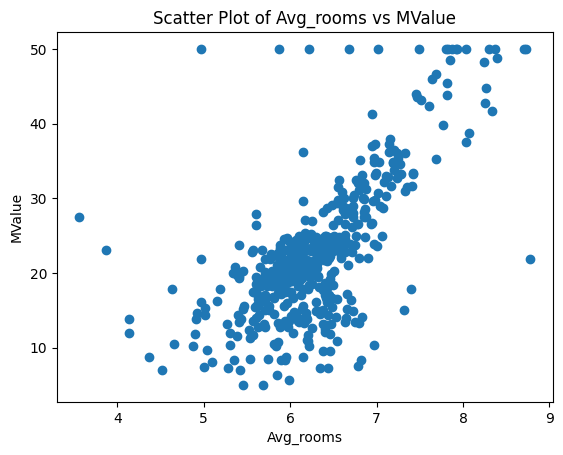

In [165]:
plt.scatter(X, y)
plt.title('Scatter Plot of Avg_rooms vs MValue')
plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.show()

In [166]:
x=data.iloc[:,5]
y=data.iloc[:,-1]


In [171]:
split=0.7
split_index=int(split*len(df))

X_train,X_test= x[:split_index],x[split_index:]
y_train, y_test = y[:split_index],y[split_index:]

In [168]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )

In [172]:
xy=X_train*y_train
n=len(X_train)

xmean=X_train.mean()
ymean=y_train.mean()

numerator=xy.sum()-n*xmean*ymean
denominator=(X_train**2).sum()-n*(xmean**2)

m=numerator/denominator
c=ymean - (m*xmean)

print('intercept-c:',c,'coefficient-m:',m)

intercept-c: -33.07539575494117 coefficient-m: 9.017518302547172


Finding best fit coefficient and intercept values for Simple Linear Regression using mathematical formula

In [173]:
X_train = np.array(X_train).reshape(-1,1)
from sklearn.linear_model import LinearRegression
mod = LinearRegression()
mod.fit(X_train, y_train)

LinearRegression()

In [174]:
co=mod.coef_
intercept = mod.intercept_

print(f'Coefficient: {co}')
print(f'Intercept: {intercept}')

Coefficient: [9.0175183]
Intercept: -33.07539575494124


using imported library to find the intercept and coefficent

In [175]:
df1 = data.iloc[:354,:]
df1

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
350,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
351,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
352,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6


In [176]:
train_model= c+m*data.iloc[:354,5]
df1['Pred_MValue'] = train_model
df1[['Avg_rooms ','MValue','Pred_MValue']]

<ipython-input-176-eb76fe554b97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Pred_MValue'] = train_model


,Avg_rooms,MValue,Pred_MValue
0,7.416,33.2,33.798520
1,6.727,27.5,27.585450
2,6.781,26.5,28.072396
3,6.405,18.6,24.681809
4,6.137,19.3,22.265114
...,...,...,...
349,5.569,17.5,17.143164
350,6.027,16.8,21.273187
351,6.593,22.4,26.377102
352,6.120,20.6,22.111816


visualising the best fit model on the train data


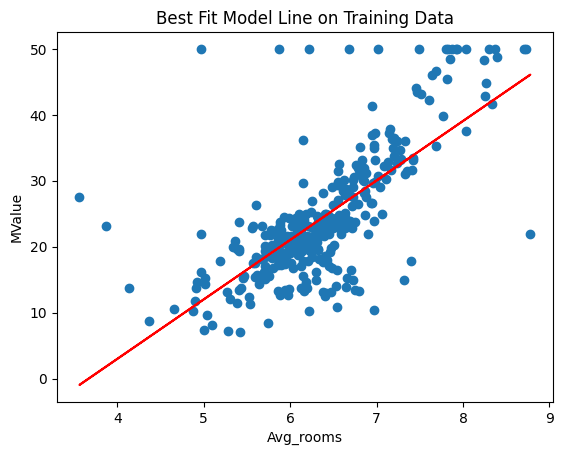

In [177]:
fig,ax = plt.subplots()
ax.scatter(x='Avg_rooms ',y='MValue',data=df1,label='Actual MValue') #plotting actual minutes
ax.plot(df1['Avg_rooms '],df1['Pred_MValue'],color='red',label='BestFitModelLine') #plotting best fit model predictions
ax.set_ylabel('MValue')
ax.set_xlabel('Avg_rooms')
ax.set_title('Best Fit Model Line on Training Data')

plt.show()


dataframe for training data

In [178]:
df2=pd.DataFrame({'Avg_rooms ':df1['Avg_rooms '],
                    'MValue':df1['MValue'],
                    'Pred_MValue':df1['Pred_MValue'],
                   'Error':(df1.Pred_MValue-df1.MValue) }) #training dataframe
df2

,Avg_rooms,MValue,Pred_MValue,Error
0,7.416,33.2,33.798520,0.598520
1,6.727,27.5,27.585450,0.085450
2,6.781,26.5,28.072396,1.572396
3,6.405,18.6,24.681809,6.081809
4,6.137,19.3,22.265114,2.965114
...,...,...,...,...
349,5.569,17.5,17.143164,-0.356836
350,6.027,16.8,21.273187,4.473187
351,6.593,22.4,26.377102,3.977102
352,6.120,20.6,22.111816,1.511816


In [179]:
mse_train=sum(df2['Error']**2)/354
mse_train

43.32646670368637

In [180]:
SST=sum((df2.MValue - df2.MValue.mean())**2) #sum of squared total
SST

31940.532796610172

In [181]:
SSE = sum(df2.Error**2) #sum of squared error
SSE

15337.569213104975

In [182]:
SSR=SST-SSE
SSR

16602.963583505196

R squared value for the trained data

In [183]:
r2_train=SSR/SST
r2_train

0.5198085983483425

In [184]:
RsqA = mod.score(df2[['Avg_rooms ']],df2['MValue'])
RsqA

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.5198085983483426

testing data model evaluation

In [186]:
df3 = data.iloc[354:507,:]
df3

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
354,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
355,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9
356,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
357,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
358,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
502,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
503,6.28807,0.0,18.10,0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
504,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6


In [187]:
test_model = c + m*data.iloc[354:507,5]
df3['Pred_MValue'] = test_model
df3[['Avg_rooms ','MValue','Pred_MValue']]

<ipython-input-187-fa38c6778dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Pred_MValue'] = test_model


,Avg_rooms,MValue,Pred_MValue
354,6.794,22.0,28.189624
355,6.030,11.9,21.300240
356,5.453,5.0,16.097132
357,6.575,24.0,26.214787
358,6.421,21.6,24.826089
...,...,...,...
501,5.854,10.8,19.713156
502,6.459,11.8,25.168755
503,6.341,14.9,24.104688
504,6.251,12.6,23.293111


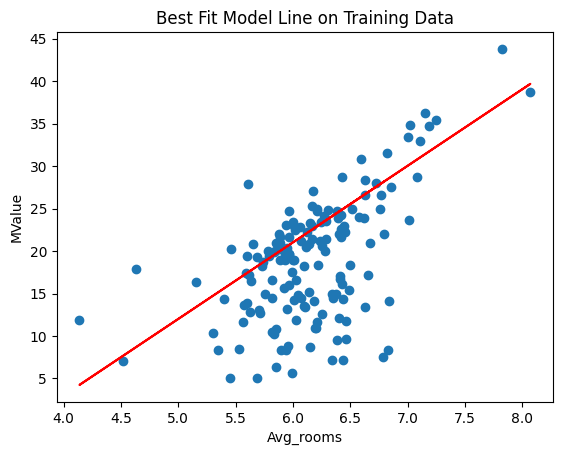

In [188]:
fig, ax = plt.subplots()
ax.scatter(x='Avg_rooms ',y='MValue',data=df3,label='Actual MValue') #plotting actual minutes
ax.plot(df3['Avg_rooms '],df3['Pred_MValue'],color='red',label='BestFitModelLine') #plotting best fit model predictions
ax.set_ylabel('MValue')
ax.set_xlabel('Avg_rooms')
ax.set_title('Best Fit Model Line on Training Data')
plt.show()

In [189]:
df4=pd.DataFrame({'Avg_rooms ':df3['Avg_rooms '],
                    'MValue':df3['MValue'],
                    'Pred_MValue':df3['Pred_MValue'],
                   'Error':(df3.Pred_MValue-df3.MValue) }) #training dataframe
df4

,Avg_rooms,MValue,Pred_MValue,Error
354,6.794,22.0,28.189624,6.189624
355,6.030,11.9,21.300240,9.400240
356,5.453,5.0,16.097132,11.097132
357,6.575,24.0,26.214787,2.214787
358,6.421,21.6,24.826089,3.226089
...,...,...,...,...
501,5.854,10.8,19.713156,8.913156
502,6.459,11.8,25.168755,13.368755
503,6.341,14.9,24.104688,9.204688
504,6.251,12.6,23.293111,10.693111


In [190]:
mse_test=sum(df4['Error']**2)/152
mse_test

48.016497699290255

In [191]:
SST=sum((df4.MValue - df4.MValue.mean())**2) #sum of squared total
SST

7834.23835526316

In [192]:
SSE = sum(df4.Error**2) #sum of squared error
SSE

7298.507650292118

In [193]:
SSR = SST - SSE
SSR

535.7307049710416

In [194]:
r2_test= SSR/SST
r2_test

0.06838325318646064

R Square value for testing data to evaluate model performance

In [195]:
np.corrcoef(data['Avg_rooms '],data['MValue'])

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

here in this model it is performed averagely train data whereas on testing data we see the model performed poorly on both mannually inputed and imported libraries show poor performance

In [199]:
from sklearn.metrics import mean_squared_error
X_train_reshaped = np.array(X_train).reshape(-1, 1)
X_test_reshaped = np.array(X_test).reshape(-1, 1)

# Reshape the output of the predict method
y_train_pred = mod.predict(X_train_reshaped).reshape(-1, 1)
y_test_pred = mod.predict(X_test_reshaped).reshape(-1, 1)

# Mean Squared Error on testing set
mse_test = mean_squared_error(y_test, y_test_pred)

# R-squared on training set
r2_train =mod.score(df2[['Avg_rooms ']],df2['MValue'])

# R-squared on testing set
r2_test = mod.score(df4[['Avg_rooms ']],df4['MValue'])

print(f'Mean Squared Error (Training): {mse_train}')
print(f'Mean Squared Error (Testing): {mse_test}')
print(f'R-squared (Training): {r2_train}')
print(f'R-squared (Testing): {r2_test}')

Mean Squared Error (Training): 43.32646670368637
Mean Squared Error (Testing): 48.01649769929029
R-squared (Training): 0.5198085983483426
R-squared (Testing): 0.06838325318645944


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
